In [1]:
from src.hyperparameter_tuner import *
from src.model_evaluation import *
from src.viz_and_model_analysis import *
from src.shap_visualizer import *

In [2]:
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline

from imblearn.over_sampling import ADASYN, SMOTE

import catboost as cb
import lightgbm as lgb
import xgboost as xgb

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd

custom_palette = {
    'Fraud': '#c53b53',
    'Non-Fraud': '#394b70'
}
sns.color_palette(list(custom_palette.values()))

[(0.7725490196078432, 0.23137254901960785, 0.3254901960784314),
 (0.2235294117647059, 0.29411764705882354, 0.4392156862745098)]

In [4]:
df = pd.read_csv('data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().max()

np.int64(0)

In [7]:
df.duplicated().sum().max()

np.int64(1081)

In [8]:
duplicadas = df[df.duplicated()]

duplicadas.groupby(list(df.columns)).size().reset_index(name='count').query('count > 1')
duplicadas.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [9]:
# df = df.drop_duplicates()

In [10]:
class_label = {
    0: 'Non-Fraud', 
    1: 'Fraud'
}

df['Class_label'] = df['Class'].map(class_label)

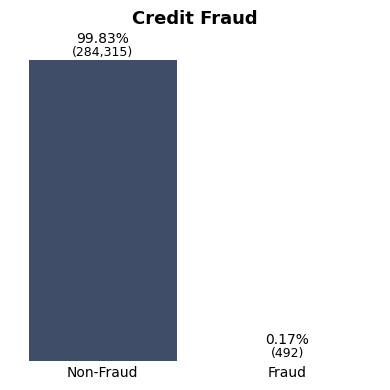

In [11]:
category_col='Class_label'

visualizer = DataVisualizer(
    dataframe=df, 
    figsize=(4, 4), 
    title = f'Credit Fraud'
    )

visualizer.plot_categorical_distribution(
    category_col=category_col, 
    palette = custom_palette
    )

In [12]:
df['Amount_log'] = np.log1p(df['Amount'])

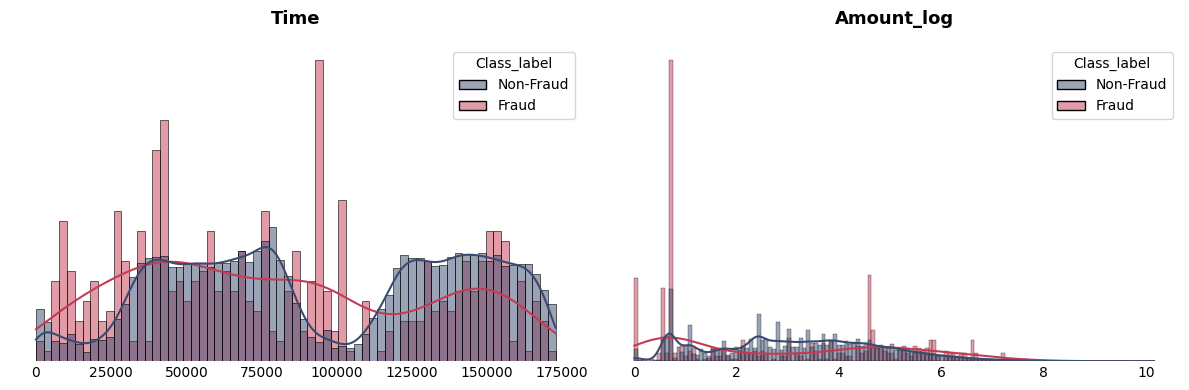

In [13]:
visualizer = DataVisualizer(
    dataframe=df, 
    figsize=(12, 4), 
    # title = f'Credit Fraud'
    )

visualizer.plot_feature_histograms(
    feature_cols=['Time', 'Amount_log'],
    group_col = 'Class_label',
    palette = custom_palette,
    common_norm=False,
    stat='density',
    kde=True,
)

In [14]:
df_corr = df.drop(['Class_label'], axis=1)
corr = df_corr.corr()

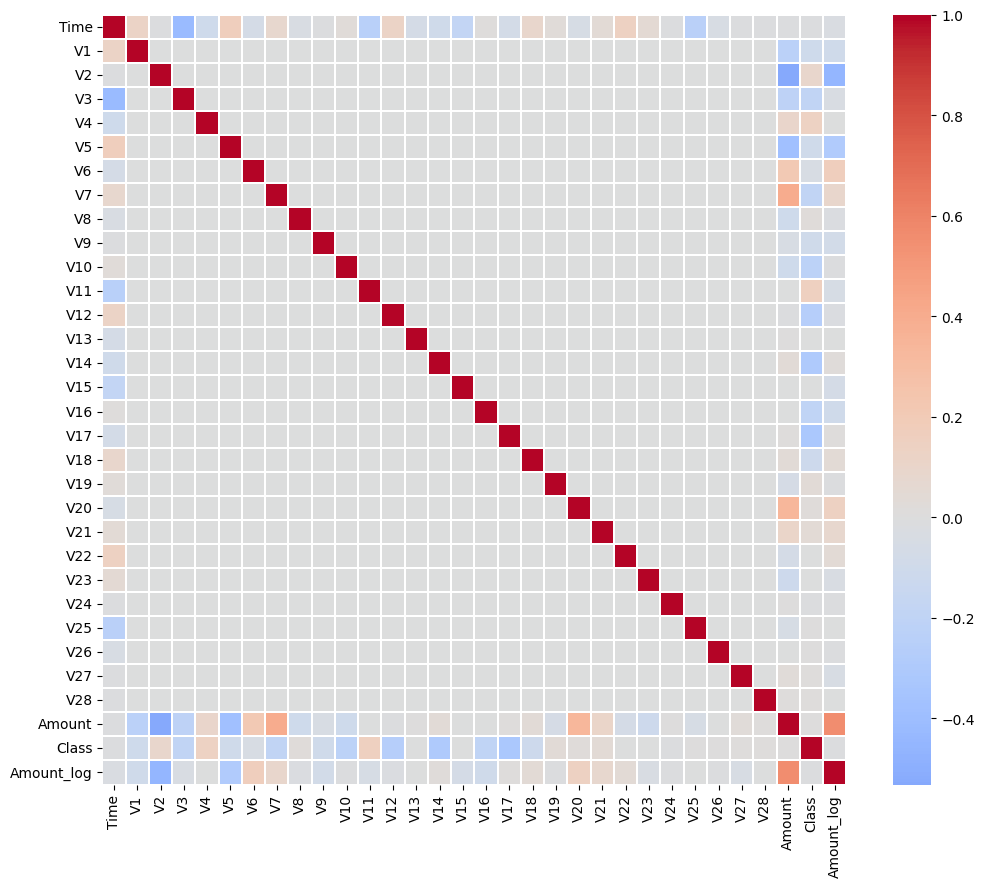

In [15]:
# Create a masked heatmap
plt.figure(figsize=(12, 10))
# plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, cmap = 'coolwarm', center = 0, linewidths=.1)
plt.show()

In [16]:
corr['Class'][corr['Class'] < -0.13]

V3    -0.192961
V7    -0.187257
V10   -0.216883
V12   -0.260593
V14   -0.302544
V16   -0.196539
V17   -0.326481
Name: Class, dtype: float64

In [17]:
corr['Class'][corr['Class'] > 0.13]

V4       0.133447
V11      0.154876
Class    1.000000
Name: Class, dtype: float64

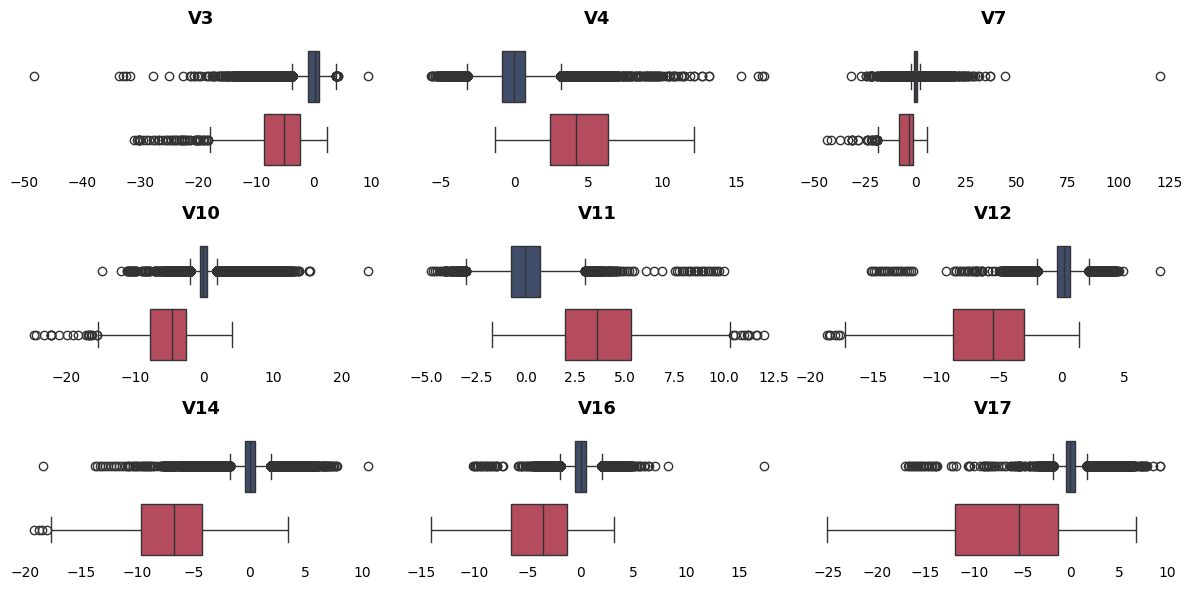

In [18]:
visualizer = DataVisualizer(
    dataframe=df, 
    figsize=(12, 6), 
    # title = f'Credit Fraud'
    )

visualizer.plot_feature_boxplots(
    feature_cols=['V3', 'V4','V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'],
    group_col = 'Class_label',
    palette = custom_palette,
)

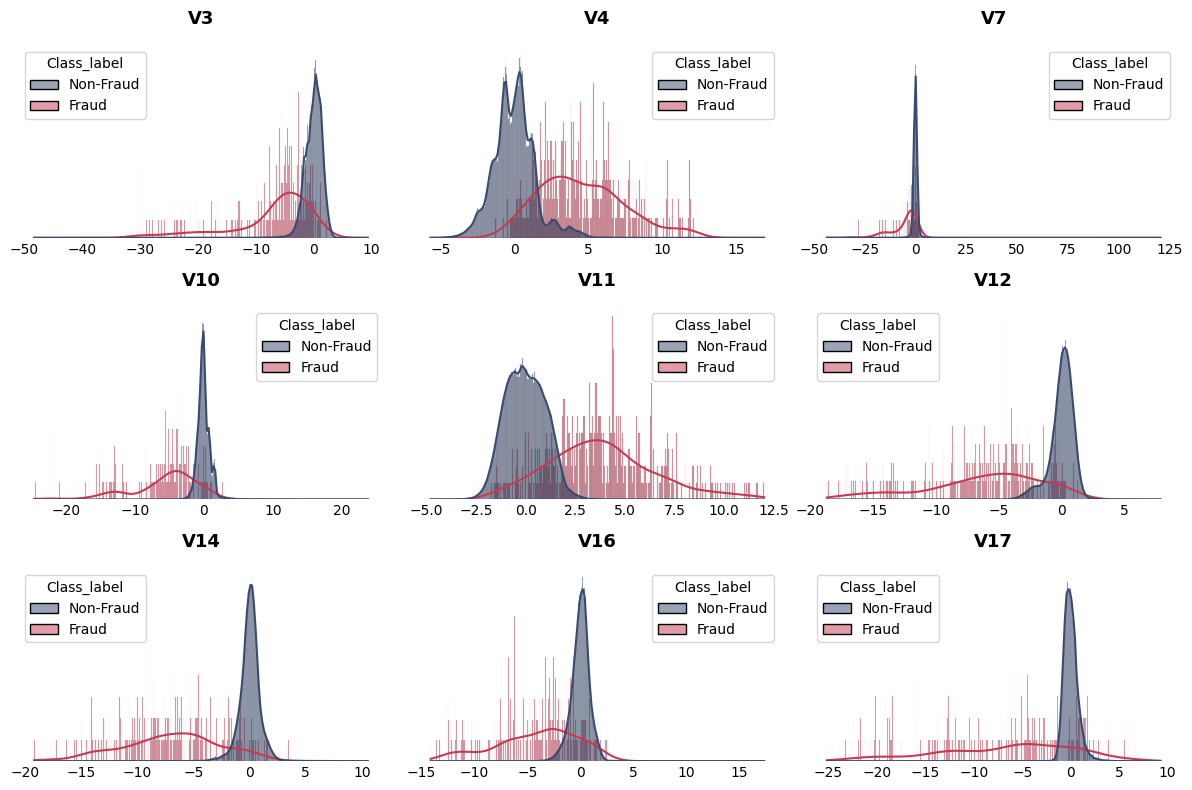

In [19]:
visualizer = DataVisualizer(
    dataframe=df, 
    figsize=(12, 8), 
    # title = f'Credit Fraud'
    )

visualizer.plot_feature_histograms(
    feature_cols=['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'],
    group_col = 'Class_label',
    palette = custom_palette,
    common_norm=False,
    stat='density',
    kde=True,
)

---

# feature Engineering

In [20]:
# robust_scaler = RobustScaler()

# df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [21]:
# features = ['Time', 'Amount']

# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(df[features])

# poly_column_names = [f"{col}_poly" for col in poly.get_feature_names_out(features)]

# df_poly = pd.DataFrame(poly_features, columns=poly_column_names)
# # df_feature = pd.concat([df_feature, df_poly.drop(['Age', 'Balance'], axis=1)], axis=1)
# df = pd.concat([df, df_poly], axis=1)
# df_poly

In [22]:
# scaler = StandardScaler()

# df[poly_column_names] = scaler.fit_transform(df[poly_column_names])

In [23]:
features = ['V14', 'V17', 'Time', 'Amount']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[features])

poly_column_names = [f"{col}_poly" for col in poly.get_feature_names_out(features)]

df_poly = pd.DataFrame(poly_features, columns=poly_column_names)
# df_feature = pd.concat([df_feature, df_poly.drop(['Age', 'Balance'], axis=1)], axis=1)
df = pd.concat([df, df_poly], axis=1)
df_poly

,V14_poly,V17_poly,Time_poly,Amount_poly,V14^2_poly,V14 V17_poly,V14 Time_poly,V14 Amount_poly,V17^2_poly,V17 Time_poly,V17 Amount_poly,Time^2_poly,Time Amount_poly,Amount^2_poly
0,-0.311169,0.207971,0.0,149.62,0.096826,-0.064714,-0.000000,-46.557159,0.043252,0.000000,31.116657,0.000000e+00,0.00,22386.1444
1,-0.143772,-0.114805,0.0,2.69,0.020670,0.016506,-0.000000,-0.386747,0.013180,-0.000000,-0.308825,0.000000e+00,0.00,7.2361
2,-0.165946,1.109969,1.0,378.66,0.027538,-0.184195,-0.165946,-62.837083,1.232032,1.109969,420.301005,1.000000e+00,378.66,143383.3956
3,-0.287924,-0.684093,1.0,123.50,0.082900,0.196967,-0.287924,-35.558583,0.467983,-0.684093,-84.485459,1.000000e+00,123.50,15252.2500
4,-1.119670,-0.237033,2.0,69.99,1.253661,0.265399,-2.239340,-78.365692,0.056185,-0.474066,-16.589956,4.000000e+00,139.98,4898.6001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,4.626942,1.991691,172786.0,0.77,21.408593,9.215439,799470.804775,3.562745,3.966833,344136.339625,1.533602,2.985500e+10,133045.22,0.5929
284803,-0.675143,-0.025693,172787.0,24.79,0.455818,0.017346,-116655.925905,-16.736794,0.000660,-4439.391383,-0.636926,2.985535e+10,4283389.73,614.5441
284804,-0.510602,0.313502,172788.0,67.88,0.260714,-0.160075,-88225.871348,-34.659653,0.098283,54169.346764,21.280501,2.985569e+10,11728849.44,4607.6944
284805,0.449624,0.509928,172788.0,10.00,0.202162,0.229276,77689.708286,4.496244,0.260027,88109.518766,5.099285,2.985569e+10,1727880.00,100.0000


In [24]:
# minmaxscaler = MinMaxScaler()

# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(df[['Time', 'Amount']])

# df[['time_minmax', 'amount_minmax']] = scaled

In [25]:
features_drop = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class_label']

In [26]:
df_corr = df.drop(features_drop, axis=1)
corr = df_corr.corr()

In [27]:
# corr['Class'][corr['Class'] > 0.5]

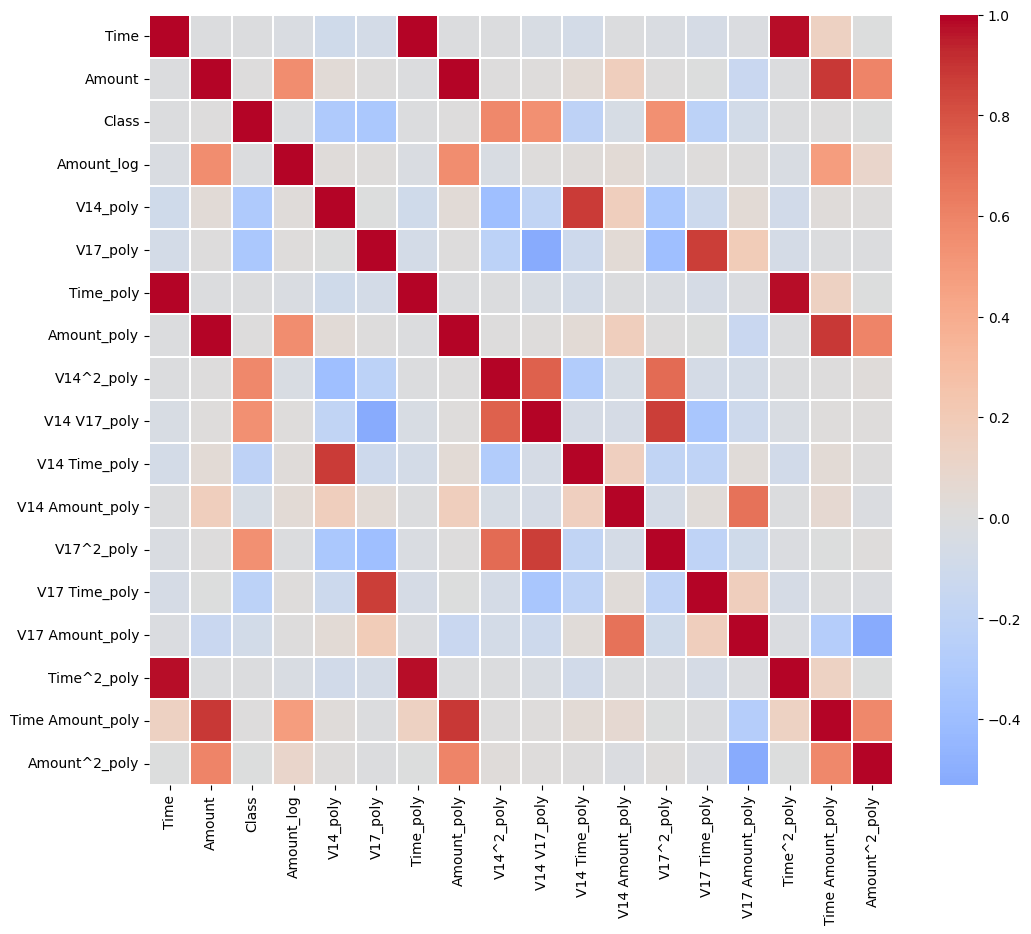

In [28]:
# Create a masked heatmap
plt.figure(figsize=(12, 10))
# plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, cmap = 'coolwarm', center = 0, linewidths=.1)
plt.show()

---

In [29]:
from scipy.stats import zscore
z_scores = zscore(df['Amount'])
outliers = df[abs(z_scores) > 3]
len(outliers)

4076

In [30]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
len(outliers)

31904

In [31]:
# df['Hour'] = (df['Time'] // 3600) % 24


In [32]:
# df['Day'] = df['Time'] // (3600 * 24)

In [33]:
# def time_bin(hour):
#     if 0 <= hour < 6:
#         return 'madrugada'
#     elif 6 <= hour < 12:
#         return 'manhã'
#     elif 12 <= hour < 18:
#         return 'tarde'
#     else:
#         return 'noite'

# df['Time_bin'] = df['Hour'].apply(time_bin)

In [34]:
# mapa = {
#     'madrugada': 0,
#     'manhã': 1,
#     'tarde': 2,
#     'noite': 3
# }
# df['Time_bin_encoded'] = df['Time_bin'].map(mapa)

In [35]:
# df['Is_night'] = df['Hour'].apply(lambda x: 1 if x < 6 else 0)

In [36]:
# features_drop = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
#  'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
#  'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class_label', 'Class']

features_drop = ['Class_label', 'Class']

In [37]:
X = df.drop(features_drop, axis=1)
y = df['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# tuner = ClassificationHyperTuner(
#     X_train=X_train, 
#     y_train=y_train, 
#     X_test=X_test,
#     y_test=y_test, 
#     model_name='xgb', 
#     use_cv=True, 
#     use_smote=True,
# )

# best_params_xgb, best_value_xgb = tuner.run_optimization()

In [40]:
# params ={
# 'learning_rate': 0.0017987581966647005,
# 'n_estimators': 1054,
# 'max_depth': 6,
# 'min_child_weight': 5,
# 'subsample': 0.9205211904238673,
# 'colsample_bytree': 0.5817550861508812,
# 'gamma': 2.025384196298485,
# 'lambda': 0.2576838772671989,
# 'alpha': 0.033825003305923404,
# 'scale_pos_weight': 0.6814876076278935,
# "eval_metric": "aucpr",
# "tree_method": "hist",
# "random_state": 42,
# "objective": "binary:logistic",
# "verbosity": 0
# }

In [59]:
params ={
"eval_metric": "aucpr",
"tree_method": "hist",
"random_state": 42,
"objective": "binary:logistic",
"verbosity": 0
    }
sampling_strategy = 0.1

In [60]:
pipeline_xgb = Pipeline([
    ('smote', SMOTE(sampling_strategy=sampling_strategy, random_state=42)),
    ('xgb', xgb.XGBClassifier(**params))
])

train_xgb = ClassificationEvaluator(model=pipeline_xgb)

cv_scores_xgb, X_train_cv, y_cv, y_pred_cv, y_proba_cv = train_xgb.cross_validate(X=X, y=y)
cv_scores_xgb

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,99.96,99.96,99.96,99.96,98.0,0.87,0.87,0.3


In [61]:
plotter = ClassificationPlotter(
    true_labels=y_cv,
    predicted_labels=y_pred_cv,
    predicted_probabilities=y_proba_cv,
    features=X_train_cv,
    model=pipeline_xgb
)

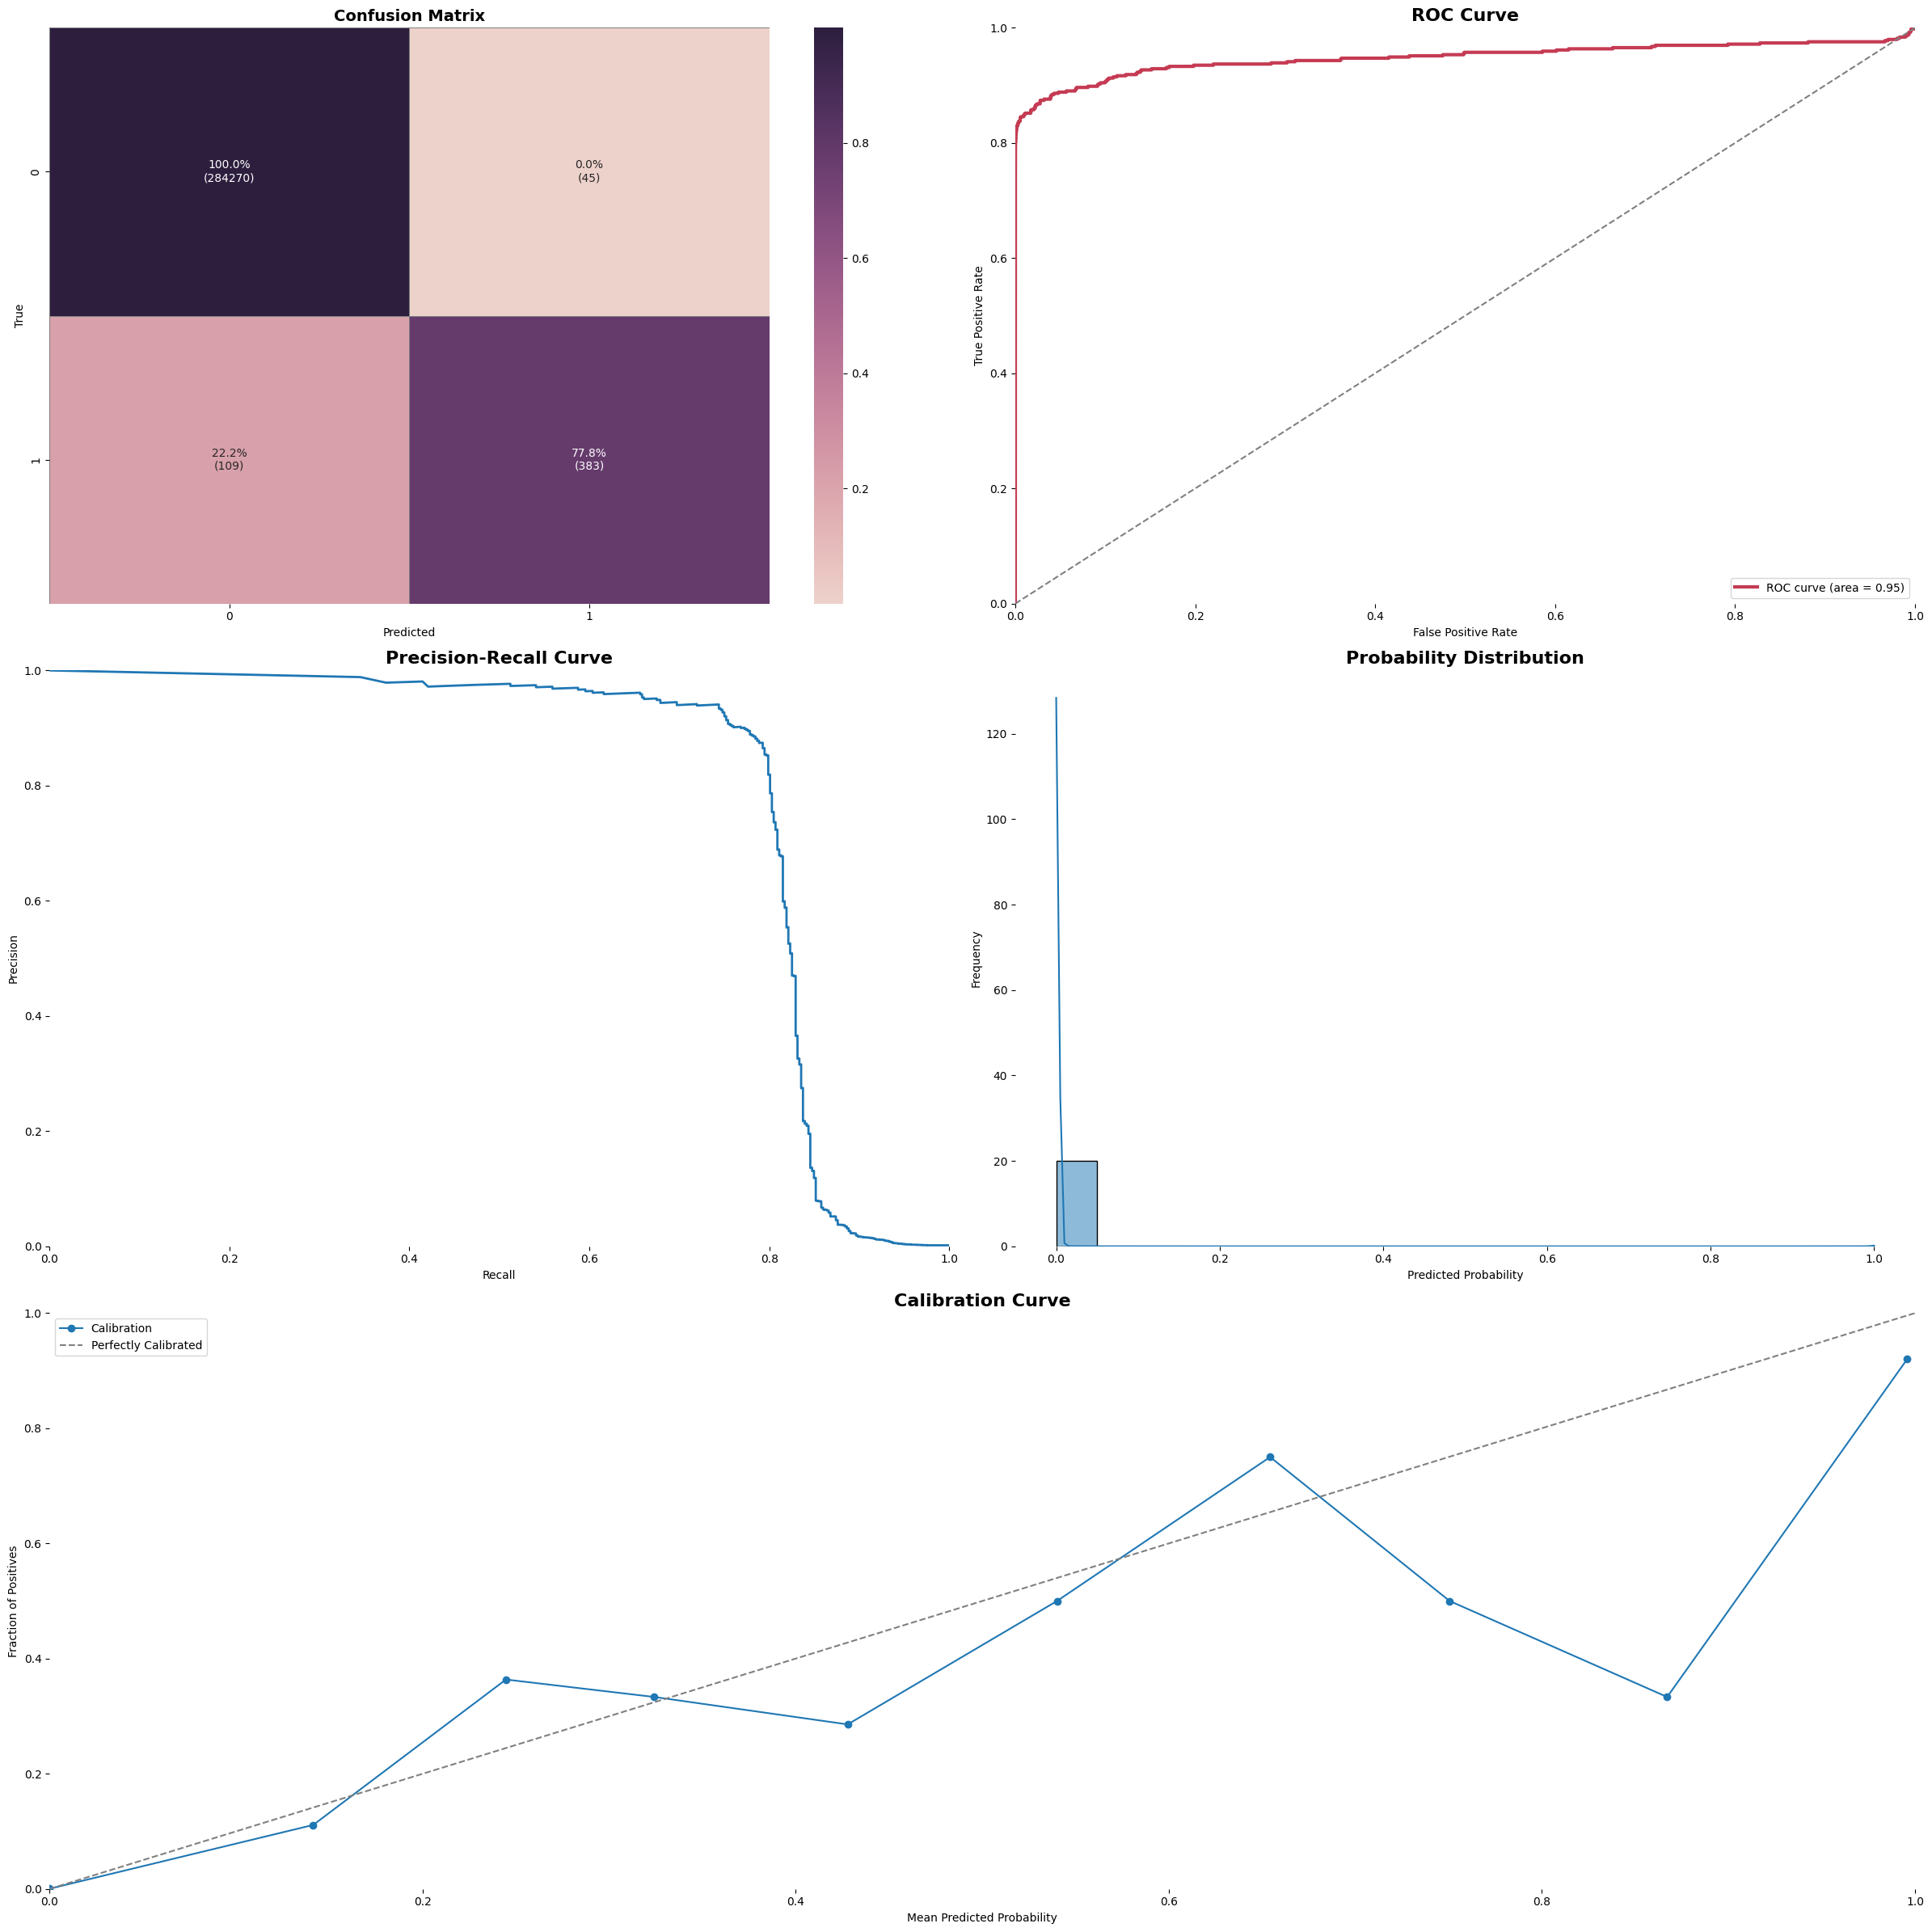

In [58]:
plotter.plot_selected_charts(
    charts = [
        'confusion_matrix',
        'roc_curve',
        'precision_recall_curve',
        'probability_distribution',
        'calibration_curve'
    ]
)

In [45]:
# pipeline_xgb = Pipeline([
#     ('ADASYN', ADASYN(random_state=42)),
#     ('xgb', xgb.XGBClassifier(**params))
# ])

# train_xgb = ClassificationEvaluator(model=pipeline_xgb)

# cv_scores_xg, X_train_cv, y_cv, y_pred_cv, y_proba_cv = train_xgb.cross_validate(X=X, y=y)
# cv_scores_xg

In [50]:
oversample_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=sampling_strategy, random_state=42)),  # SMOTE parcial
    ('adasyn', ADASYN(sampling_strategy='auto', random_state=42)),  # completa com ADASYN
    ('clf', xgb.XGBClassifier(**params))
])

train_xgb = ClassificationEvaluator(model=oversample_pipeline)

cv_scores_xg, X_train_cv, y_cv, y_pred_cv, y_proba_cv = train_xgb.cross_validate(X=X, y=y)
cv_scores_xg

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Matthews Corrcoef,Cohen Kappa,Log Loss
0,99.95,99.95,99.95,99.95,97.96,0.86,0.86,0.33


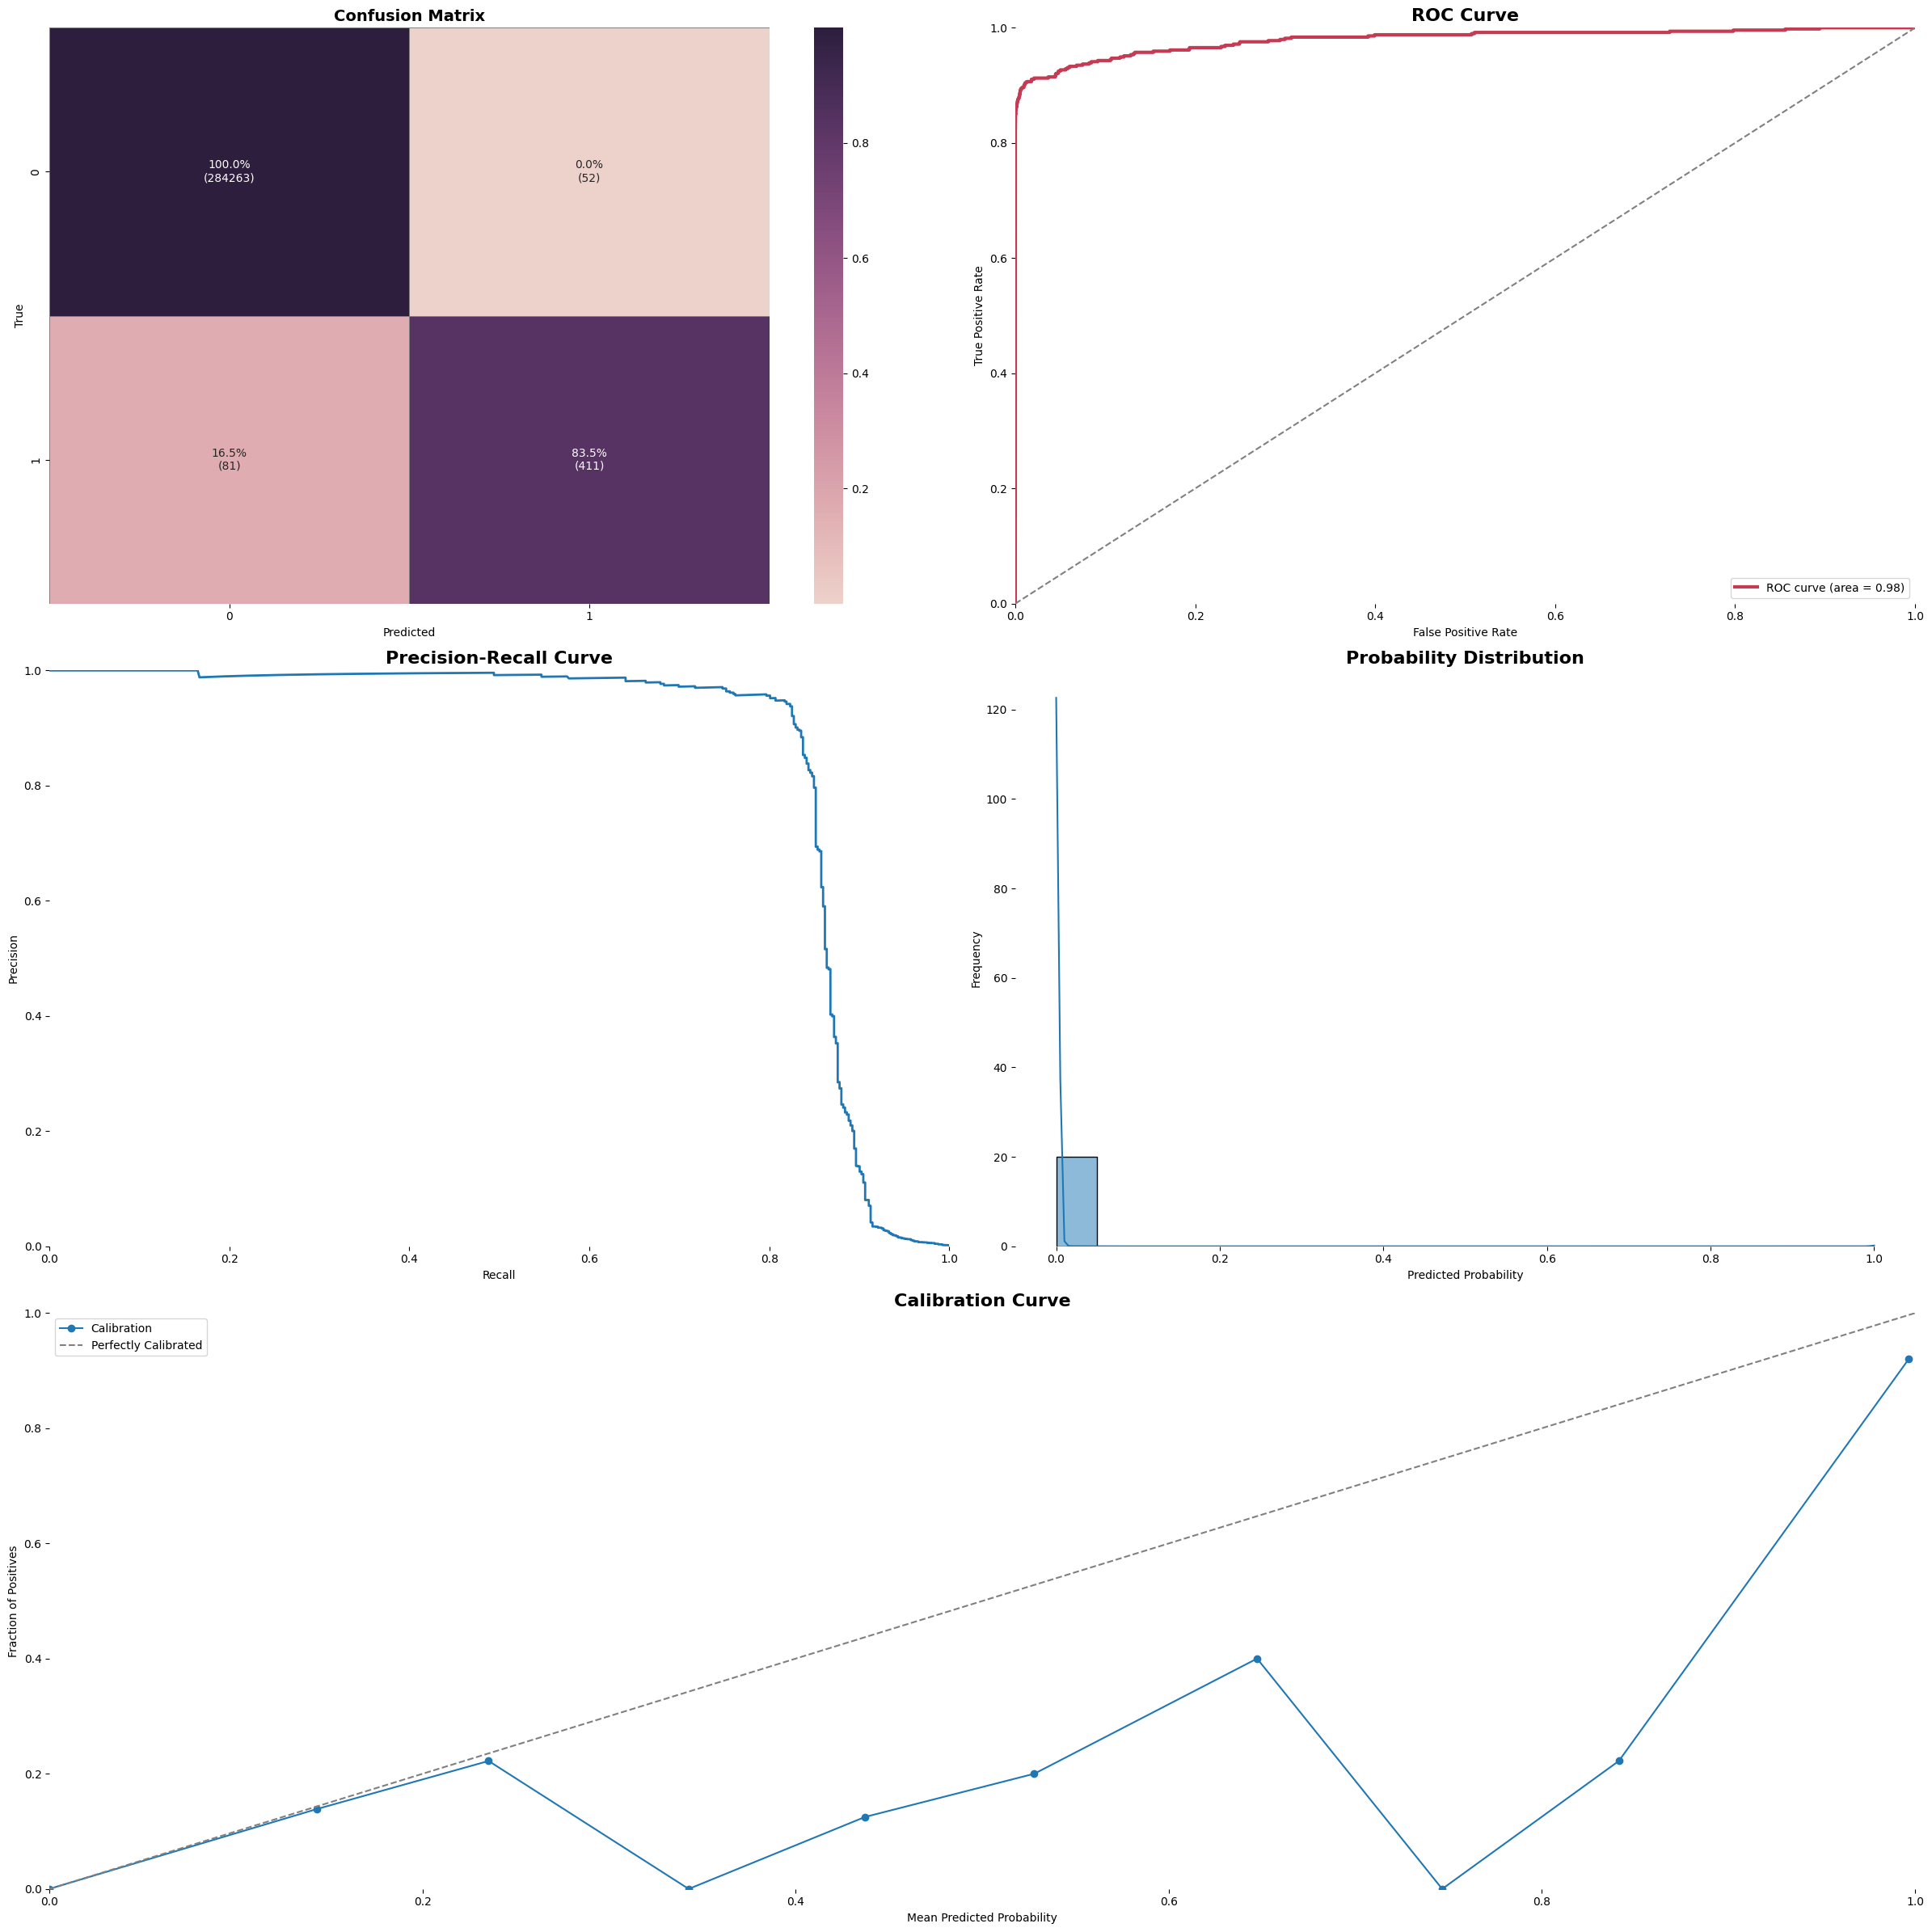

In [51]:
plotter = ClassificationPlotter(
    true_labels=y_cv,
    predicted_labels=y_pred_cv,
    predicted_probabilities=y_proba_cv,
    features=X_train_cv,
    model=pipeline_xgb
)
plotter.plot_selected_charts(
    charts = [
        'confusion_matrix',
        'roc_curve',
        'precision_recall_curve',
        'probability_distribution',
        'calibration_curve'
    ]
)